# Import Libraries

In [372]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import tkinter as tk
from tkinter.scrolledtext import ScrolledText
import sys
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import numpy as np

# Load data

In [418]:
categories = ['SPORTS', 'BUSINESS', 'EDUCATION']
df = pd.read_csv('./data/news-article-categories.csv', usecols=['title','category'])
# print(df.head())
# print(df.tail())
category_counts = df['category'].value_counts()
print(category_counts)

category
ARTS & CULTURE    1002
BUSINESS           501
ENTERTAINMENT      501
ENVIRONMENT        501
POLITICS           501
RELIGION           501
SPORTS             501
TECH               501
WOMEN              501
EDUCATION          490
COMEDY             380
SCIENCE            350
MEDIA              347
CRIME              300
Name: count, dtype: int64


# Filtering Data

In [455]:
data = []
for category in categories:
    category_data = df[df['category'] == category.upper()]
    # Append the category data to the list
    data.append(category_data)

# Concatenate the category data into a single DataFrame
# df = pd.concat(data)

filtered_category_counts = df['category'].value_counts()
print(filtered_category_counts)

null_rows = df[df.isnull().any(axis=1)]

# Display null rows
print(f'Null rows:\n{null_rows}')

print(df.head())
print(df.tail())


category
SPORTS       501
BUSINESS     501
EDUCATION    490
Name: count, dtype: int64
Null rows:
Empty DataFrame
Columns: [category, title, Cluster]
Index: []
     category                                              title  Cluster
5374   SPORTS  SPORTS SPORTS SPORTS Jets Chairman Christopher...        2
5375   SPORTS  SPORTS SPORTS SPORTS Trump Posthumously Pardon...        2
5376   SPORTS  SPORTS SPORTS SPORTS NFL Bans Kneeling During ...        2
5377   SPORTS  SPORTS SPORTS SPORTS The History Of The Nation...        2
5378   SPORTS  SPORTS SPORTS SPORTS Israeli Soccer Team Beita...        2
       category                                              title  Cluster
2668  EDUCATION  EDUCATION EDUCATION EDUCATION Cheryl Williams,...        1
2669  EDUCATION  EDUCATION EDUCATION EDUCATION Excuses ‘R' Us I...        1
2670  EDUCATION  EDUCATION EDUCATION EDUCATION Thomas Whitby's ...        1
2671  EDUCATION  EDUCATION EDUCATION EDUCATION Developing Resil...        1
2672  EDUCATION  

# TF-IDF vectorization

In [456]:
# Concatenate 'category' and 'title' columns
df['title'] = df['category'] + ' ' + df['title']

# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, stop_words='english', use_idf=True)

# Fit the vectorizer on concatenated text
X = vectorizer.fit_transform(df['title'])
# Print the shape of the TF-IDF matrix
print("TF-IDF matrix shape:", X.shape)

TF-IDF matrix shape: (1492, 1568)


# Elbow method  vs Elbow method:

/Users/sanjokdangol/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sanjokdangol/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sanjokdangol/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sanjokdangol/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

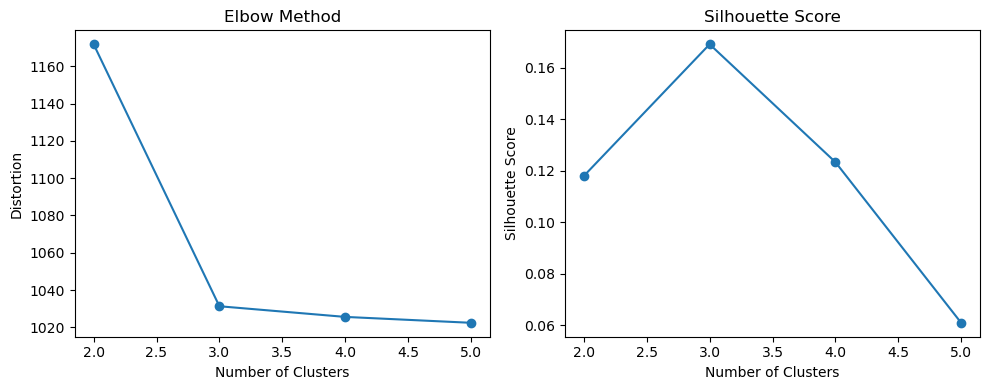

In [457]:
# Define range of clusters to evaluate
range_n_clusters = range(2, 6)
distortions = []
silhouette_scores = []

# Calculate distortions and silhouette scores for each number of clusters
for n_clusters in range_n_clusters:
    kmodel = KMeans(n_clusters=n_clusters, random_state=42)
    kmodel.fit(X)
    distortions.append(kmodel.inertia_)
    silhouette_scores.append(silhouette_score(X, kmodel.labels_))

# Plot results
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, distortions, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')

plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# KMeans clustering

In [458]:
# KMeans clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=100, n_init=10, random_state=42)
kmeans.fit(X)

# Assuming kmeans is your fitted KMeans model
unique_clusters = len(set(kmeans.labels_))

print("Number of clusters:", unique_clusters)

unique_labels, counts = np.unique(kmeans.labels_, return_counts=True)

# Print unique labels and their counts
for label, count in zip(unique_labels, counts):
    print(f"Cluster: {label}, Count: {count} documents")


Number of clusters: 3
Cluster: 0, Count: 501 documents
Cluster: 1, Count: 490 documents
Cluster: 2, Count: 501 documents


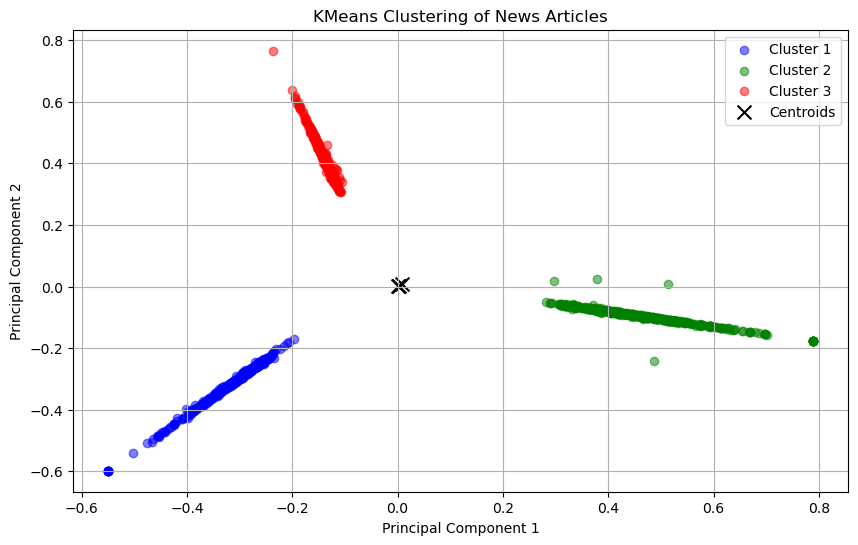

In [459]:
# Reduce dimensionality for visualization
pca = PCA(n_components=2)
tfidf_reduced = pca.fit_transform(X.toarray())
n_clusters = 3
# Plot clusters
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red','yellow']
for i in range(n_clusters):
    plt.scatter(tfidf_reduced[kmeans.labels_ == i, 0], tfidf_reduced[kmeans.labels_ == i, 1], 
                c=colors[i], label='Cluster ' + str(i + 1), alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 1], marker='x', s=100, c='black', label='Centroids')
plt.title('KMeans Clustering of News Articles')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# visualize the clusters along with the Voronoi cells.

ValueError: 'c' argument has 1492 elements, which is inconsistent with 'x' and 'y' with size 1.

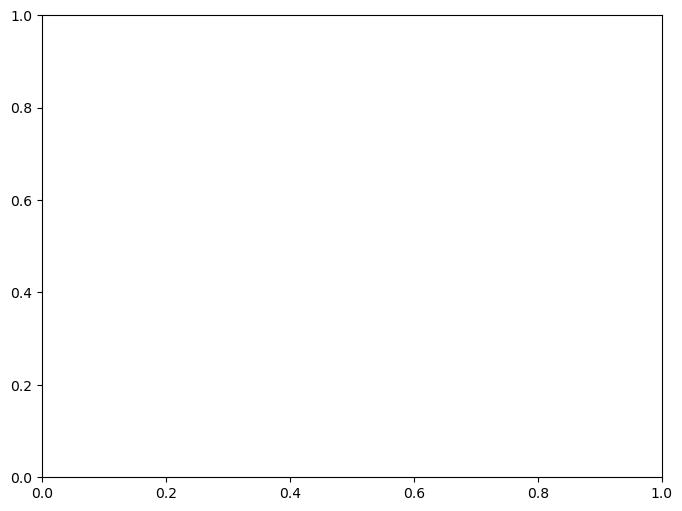

In [452]:

# Plotting the clusters and centroids
plt.figure(figsize=(8, 6))

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.7)

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, c='red')

# Plot Voronoi cells
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect='auto', origin='lower', alpha=0.3)

plt.title('K-means Clustering with Voronoi Cells')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()


# predict Cluster Method

In [475]:
def get_category(cluster):
    return {
        0: 'BUSINESS',
        1: 'EDUCATION',
        2: 'SPORTS'
    }.get(cluster, 'Unknown')

def predict_cluster_and_category(input_text):
    input_vector = vectorizer.transform([input_text])
    print(input_vector)
    cluster = kmeans.predict(input_vector)[0]
    category = df.iloc[cluster]['category']
    
    print("Predicted cluster:", cluster)

    return cluster, get_category(cluster)

input_text = "education"
cluster = predict_cluster_and_category(input_text)
print(cluster)

  (0, 443)	1.0
Predicted cluster: 1
(1, 'EDUCATION')


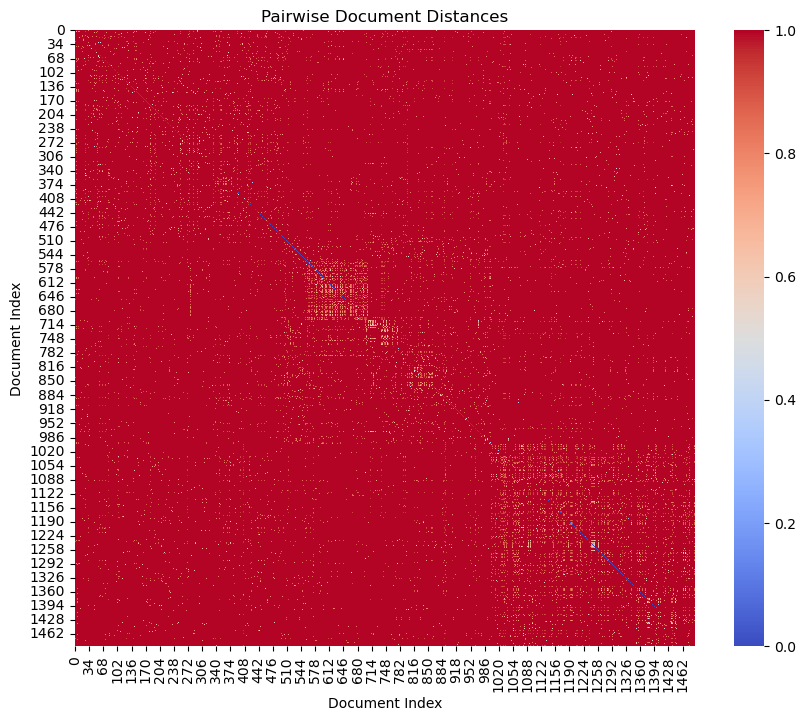

In [207]:
import numpy as np
import seaborn as sns
from sklearn.metrics import pairwise_distances

# Assuming tfidf_matrix is your document-term matrix or feature matrix
# Calculate pairwise distances between documents
distances = pairwise_distances(X, metric='cosine')

# Plot the distances as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(distances, cmap='coolwarm', annot=False)
plt.title('Pairwise Document Distances')
plt.xlabel('Document Index')
plt.ylabel('Document Index')
plt.show()

category
SPORTS       501
BUSINESS     501
EDUCATION    490
Name: count, dtype: int64


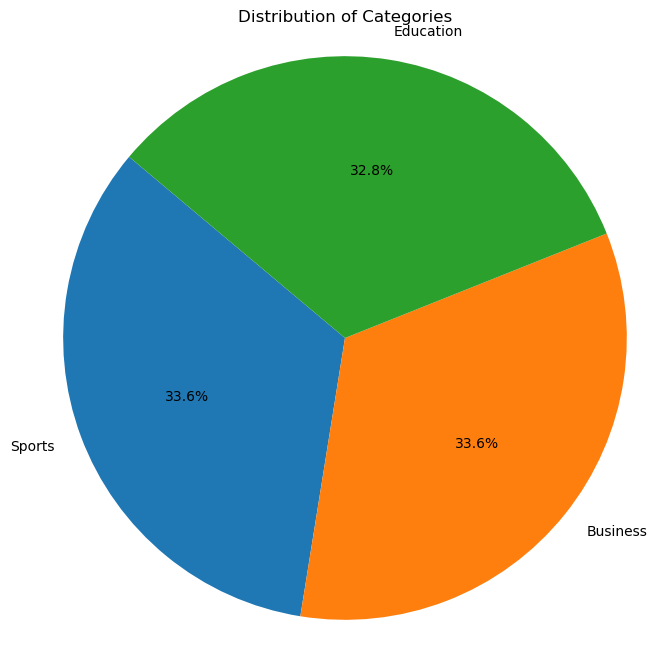

In [293]:
labels = ['Sports', 'Business', 'Education']
category_counts = df['category'].value_counts()
print(category_counts)
# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

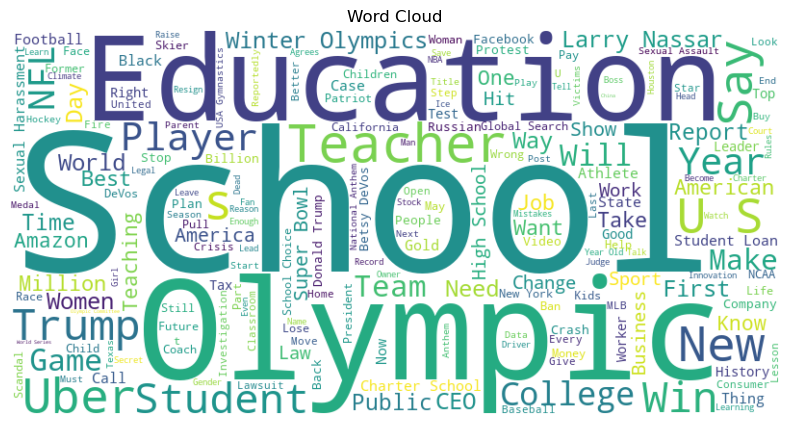

In [209]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample text data
text_data = ' '.join(df['title'].tolist())
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud')
plt.axis('off')
plt.show()


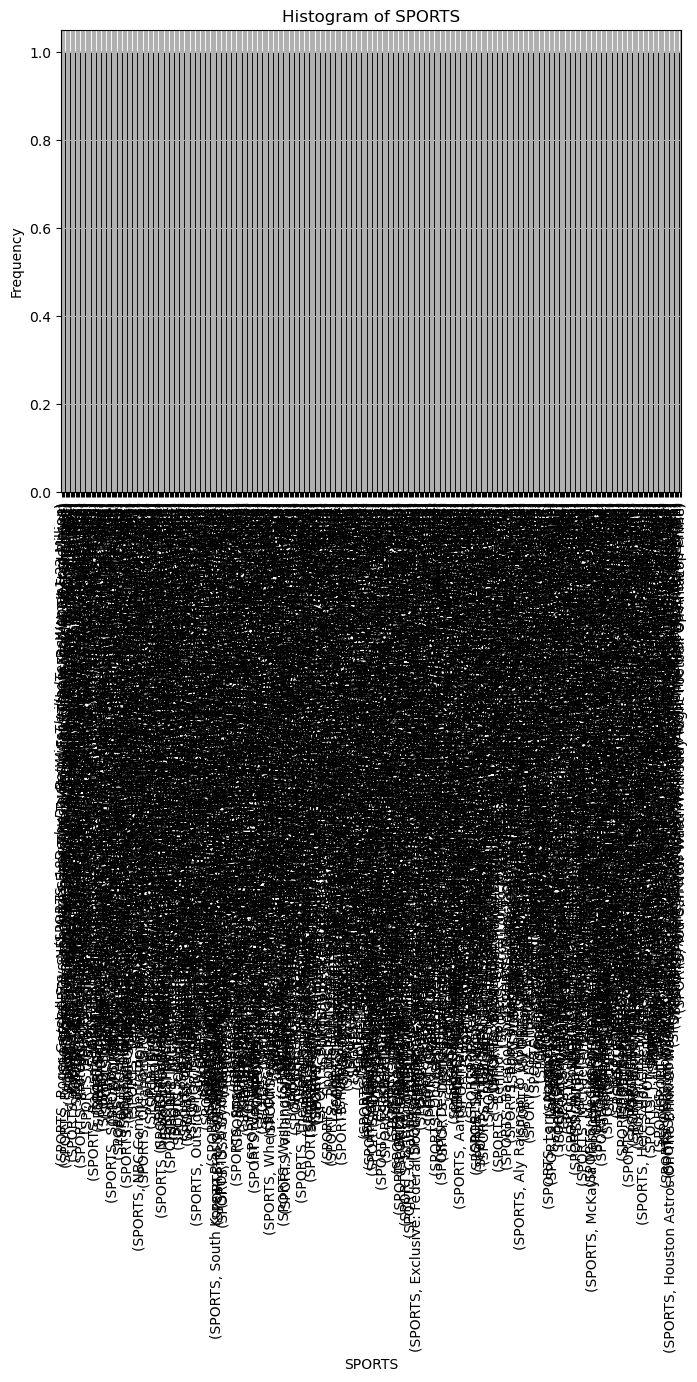

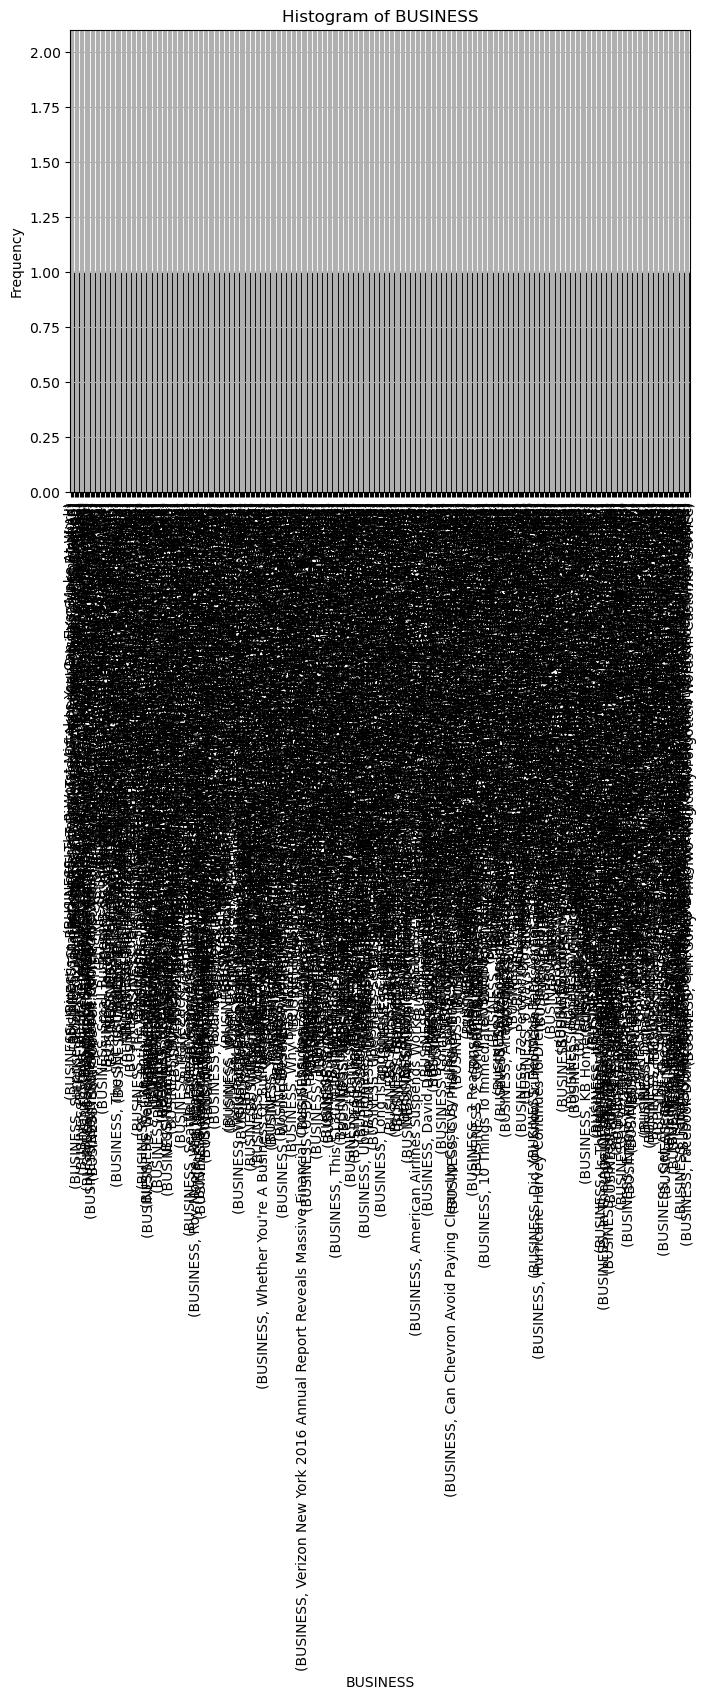

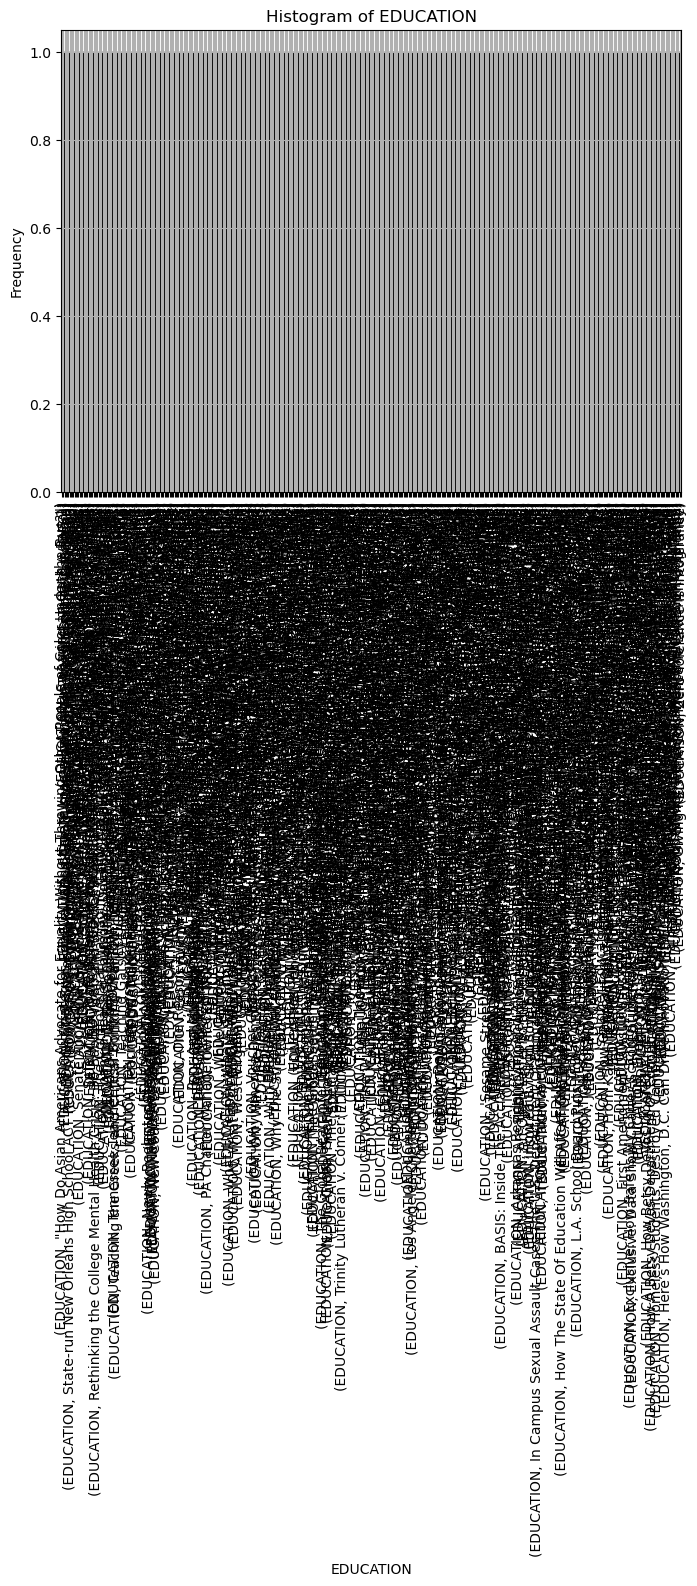

In [157]:
categorical_cols = ['SPORTS', 'BUSINESS', 'EDUCATION']

for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    result[result['category'] == col.upper()].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

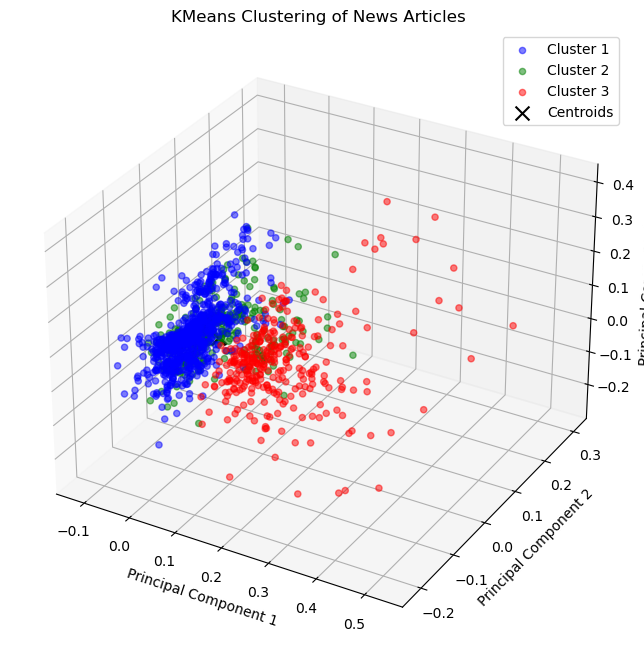

In [158]:
from mpl_toolkits.mplot3d import Axes3D

# KMeans clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=200, n_init=10, random_state=42)
kmeans.fit(tfidf_matrix)

# Reduce dimensionality for visualization
pca = PCA(n_components=3)  # Change the number of components to 3
tfidf_reduced = pca.fit_transform(tfidf_matrix.toarray())

# Plot clusters in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
colors = ['blue', 'green', 'red']
for i in range(n_clusters):
    ax.scatter(tfidf_reduced[kmeans.labels_ == i, 0], tfidf_reduced[kmeans.labels_ == i, 1], tfidf_reduced[kmeans.labels_ == i, 2], 
               c=colors[i], label='Cluster ' + str(i + 1), alpha=0.5)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], 
           marker='x', s=100, c='black', label='Centroids')
ax.set_title('KMeans Clustering of News Articles')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()


In [ ]:
#     category_tfidf_matrix = vectorizer.transform(category_data['title'])
#     category_clusters = kmeans.predict(category_tfidf_matrix)
    
#     print(f"First 5 rows of {category} category with their cluster numbers:")
#     for i, row in enumerate(category_data.iterrows()):
#         print(f"Row {i+1}: Cluster {category_clusters[i]} - {row[1]['title']}")
#     print()
# vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, stop_words='english', use_idf=True)
# tfidf_matrix = vectorizer.fit_transform(df)

# n_clusters = 3  # Number of clusters
# kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=200, random_state=42)
# kmeans.fit(tfidf_matrix)

# labels = kmeans.labels_
# wiki_cl=pd.DataFrame(list(zip(df,labels)),columns=['category','cluster']) 
# print(wiki_cl.sort_values(by=['cluster']))

      category                                              title
1002  BUSINESS  U.S. Launches Auto Import Probe, China Vows To...
1003  BUSINESS  Starbucks Says Anyone Can Now Sit In Its Cafes...
1004  BUSINESS  Seattle Passes Controversial New Tax On City's...
1005  BUSINESS  Uber Ends Forced Arbitration In Individual Cas...
1006  BUSINESS      How Uber Silences Women After Sexual Assaults


ValueError: n_samples=2 should be >= n_clusters=3.

In [91]:


# df['title'] = df['title'] + ' (' + df['category'] + ')'

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, stop_words='english', use_idf=True)
tfidf_matrix = vectorizer.fit_transform(df['title'])

n_clusters = 3  # Number of clusters
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=200, random_state=42)
kmeans.fit(tfidf_matrix)

labels = kmeans.labels_
wiki_cl=pd.DataFrame(list(zip(df['category'],labels)),columns=['category','cluster']) 
print(wiki_cl.sort_values(by=['cluster']))



       category  cluster
15447    sports        0
14714    sports        0
14713    sports        0
14712    sports        0
14711    sports        0
...         ...      ...
5884   business        2
5883   business        2
5882   business        2
5888   business        2
0      business        2

[30896 rows x 2 columns]


In [92]:
# Predict cluster for user input
def predict_cluster_and_category(input_text):
    input_vector = vectorizer.transform([input_text])
    cluster = kmeans.predict(input_vector)
    print(cluster)
    return cluster[0]

# sports_data = df[df['category'] == 'sports'].head(5)
# print(sports_data)

# business_data = df[df['category'] == 'business'].head(5)
# print(business_data)

# health_data = df[df['category'] == 'health'].head(5)
# print(health_data)

# Print the first 5 rows of each category with their cluster numbers
for category in categories:
    category_data = df[df['category'] == category].head(5)
    category_tfidf_matrix = vectorizer.transform(category_data['title'])
    category_clusters = kmeans.predict(category_tfidf_matrix)
    
    print(f"First 5 rows of {category} category with their cluster numbers:")
    for i, row in enumerate(category_data.iterrows()):
        print(f"Row {i+1}: Cluster {category_clusters[i]} - {row[1]['title']}")
    print()

input_text ='Elon Musk สะท้อนความกังวลของ CEO Twitter'
predicted_cluster = predict_cluster_and_category(input_text)
print("Predicted Cluster:", predicted_cluster)

First 5 rows of business category with their cluster numbers:
Row 1: Cluster 2 - Elon Musk สะท้อนความกังวลของ CEO Twitter เกี่ยวกับวิกฤตภาวะเงินเฟ้อขั้นรุนแรง (business) (business) (business) (business) (business) (business) (business) (business) (business) (business) (business)
Row 2: Cluster 2 - La 10mila lire con Alessandro Volta: il suo valore? Uno stipendio o forse più (business) (business) (business) (business) (business) (business) (business) (business) (business) (business) (business)
Row 3: Cluster 2 - UBS odnotował najwyższy kwartalny zysk od 2015 r. (business) (business) (business) (business) (business) (business) (business) (business) (business) (business) (business)
Row 4: Cluster 2 - Firma Wintershall Dea w III kw. odnotowała 245 proc. zysku r/r (business) (business) (business) (business) (business) (business) (business) (business) (business) (business) (business)
Row 5: Cluster 2 - La CE lanzará una directiva para un impuesto mínimo del 15% en Sociedades antes de fin de 

In [4]:
window = tk.Tk()
window.title("Document Clustering")
window.minsize(600, 400)

text_box = ScrolledText(window)
text_box.grid(row=0, column=0, padx=5, pady=5, sticky="nsew")

predicted_cluster_label = tk.Label(window, text="Predicted Cluster:")
predicted_cluster_label.grid(row=1, column=0, padx=5, pady=5, sticky="w")

predicted_category_label = tk.Label(window, text="Predicted Category:")
predicted_category_label.grid(row=2, column=0, padx=5, pady=5, sticky="w")

def process_input():
    input_text = text_box.get("1.0", tk.END)
    predicted_cluster, category = predict_cluster_and_category(input_text)
    predicted_cluster_label.config(text=f"Predicted Cluster: {predicted_cluster}")
    predicted_category_label.config(text=f"Predicted Category: {category}")
    print("Predicted Cluster:", predicted_cluster)
    print("Category Name:", category)

# Tkinter GUI components
btn = tk.Button(window, text="Cluster Documents", command=process_input)
btn.grid(row=3, column=0, padx=5, pady=5)

window.mainloop()

Predicted Cluster: 0
Category Name: business


## Plots a scatter plot showing the relationship between clusters and documents.

In [216]:
from sklearn.decomposition import PCA

def plot_cluster_documents(df, vectorizer, kmeans_model):
    """
    Plots a scatter plot showing the relationship between clusters and documents.
    
    Args:
    - df (DataFrame): The DataFrame containing the clustered data.
    - vectorizer (TfidfVectorizer): The TF-IDF vectorizer fitted on the training data.
    - kmeans_model (KMeans): The K-means model trained on the training data.
    """
    # Transform text data into TF-IDF vectors
    tfidf_matrix = vectorizer.transform(df['title'])
    
    # Predict clusters for each document
    predicted_clusters = kmeans_model.predict(tfidf_matrix)
    
    # Add predicted clusters to DataFrame
    df['Cluster'] = predicted_clusters
    
    # Convert sparse matrix to dense matrix
    dense_matrix = tfidf_matrix.toarray()
    
    # Reduce dimensionality using PCA
    pca = PCA(n_components=2, random_state=42)
    pca_embedded = pca.fit_transform(dense_matrix)
    
    # Plot the clusters and documents
    plt.figure(figsize=(10, 6))
    for cluster in df['Cluster'].unique():
        plt.scatter(pca_embedded[df['Cluster'] == cluster, 0], 
                    pca_embedded[df['Cluster'] == cluster, 1], 
                    label=f'Cluster {cluster}')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('PCA Plot of Clusters and Documents')
    plt.legend()
    plt.grid()
    plt.show()

# Example usage:
plot_cluster_documents(df, vectorizer, kmeans)

ValueError: X has 2 features, but KMeans is expecting 1568 features as input.